In [1]:
from sqlalchemy import create_engine
import pandas as pd
from decouple import config

DATABASE_URL = config('DATABASE_URL')
engine = create_engine(DATABASE_URL)

In [2]:
df = pd.read_sql_query('select * from "shoes"',con=engine)

In [3]:
df

,id,name,price,free_shipping,total_images,seller_rating,url,model,shoe_size,adult_shoe,youth_shoe,child_shoe,sold,item_description,item_offer_info,item_bid_info,desc_fre_score,desc_avg_grade_score,sold_date
0,1224,Details about Sacai x KAWS x Nike Blazer Low...,170.00,False,6,32,https://www.ebay.com/itm/175050561094?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.0,True,False,False,True,sacai x kaws x nike blazer low red size brand ...,None,None,100,6,2021-12-05
1,1225,Details about Nike Blazer Low x sacai x KAWS...,180.00,True,13,8,https://www.ebay.com/itm/194546871771?hash=ite...,Sacai x KAWS x Nike Blazer Low,8.0,True,False,False,True,nike blazer low x sacai x kaws team red chitos...,None,None,-29,40,2021-12-05
2,1226,Details about Size 13 Mens Nike KAWS x sacai...,195.00,False,2,20,https://www.ebay.com/itm/165214297323?hash=ite...,Sacai x KAWS x Nike Blazer Low,13.0,True,False,False,True,size men nike kaws x sacai x blazer low team,None,None,104,4,2021-12-05
3,1227,Details about Sacai x KAWS x Nike Blazer Low...,187.00,False,2,8,https://www.ebay.com/itm/165212102183?hash=ite...,Sacai x KAWS x Nike Blazer Low,9.0,True,False,False,True,sacai x kaws x nike blazer low red size new box,None,None,103,4,2021-12-05
4,1228,Details about Sacai x KAWS x Nike Blazer Low...,199.00,True,8,689,https://www.ebay.com/itm/133953233635?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.0,True,False,False,True,brand new box free shipping please let know qu...,None,None,86,7,2021-12-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,1502,sacai kaws nike blazer low red dm size,210.00,False,8,78,https://www.ebay.com/itm/224738124434?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.0,True,False,False,False,sacai x kaws x nike blazer low red size,True,False,105,3,NaT
314,1503,nike blazer low sacai kaws red size dm,190.00,False,7,7,https://www.ebay.com/itm/353786853897?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.5,True,False,False,False,nike blazer low sacai kaws red size,True,False,107,4,NaT
315,1504,new nike kaws sacai blazer low team red dm uni...,209.99,False,7,382,https://www.ebay.com/itm/203750931981?hash=ite...,Sacai x KAWS x Nike Blazer Low,11.5,True,False,False,False,sale nike x sacai x kawsblazer lowteam red hot...,True,False,-7,33,NaT
316,1505,nike kaws sacai blazer low team red white dm s...,215.00,True,5,553,https://www.ebay.com/itm/304247927111?hash=ite...,Sacai x KAWS x Nike Blazer Low,11.5,True,False,False,False,nike x kaws x sacai blazer lowteam redsize new...,True,False,58,13,NaT


In [4]:
df = df.drop(columns=['id', 'name', 'item_description', 'item_offer_info', 'item_bid_info', 'model', 'url', 'sold_date'])

In [5]:
df = df.drop(columns=['adult_shoe', 'youth_shoe', 'child_shoe'])

In [6]:
df["free_shipping"] = df["free_shipping"].astype(int)
df["sold"] = df["sold"].astype(int)

In [7]:
df

,price,free_shipping,total_images,seller_rating,shoe_size,sold,desc_fre_score,desc_avg_grade_score
0,170.00,0,6,32,10.0,1,100,6
1,180.00,1,13,8,8.0,1,-29,40
2,195.00,0,2,20,13.0,1,104,4
3,187.00,0,2,8,9.0,1,103,4
4,199.00,1,8,689,10.0,1,86,7
...,...,...,...,...,...,...,...,...
313,210.00,0,8,78,10.0,0,105,3
314,190.00,0,7,7,10.5,0,107,4
315,209.99,0,7,382,11.5,0,-7,33
316,215.00,1,5,553,11.5,0,58,13


### Filling Missing Values with the Average

In [8]:
price_fillna_value = round(df["price"].mean(),2)
free_shipping_fillna_value = int(df["free_shipping"].mean())
total_images_fillna_value = int(df["total_images"].mean())
seller_rating_fillna_value = int(df["seller_rating"].mean())
shoe_size_fillna_value = int(df["shoe_size"].mean())

df["price"].fillna(price_fillna_value,inplace=True)
df["free_shipping"].fillna(free_shipping_fillna_value,inplace=True)
df["total_images"].fillna(total_images_fillna_value,inplace=True)
df["seller_rating"].fillna(seller_rating_fillna_value,inplace=True)
df["shoe_size"].fillna(shoe_size_fillna_value,inplace=True)

df

,price,free_shipping,total_images,seller_rating,shoe_size,sold,desc_fre_score,desc_avg_grade_score
0,170.00,0,6,32,10.0,1,100,6
1,180.00,1,13,8,8.0,1,-29,40
2,195.00,0,2,20,13.0,1,104,4
3,187.00,0,2,8,9.0,1,103,4
4,199.00,1,8,689,10.0,1,86,7
...,...,...,...,...,...,...,...,...
313,210.00,0,8,78,10.0,0,105,3
314,190.00,0,7,7,10.5,0,107,4
315,209.99,0,7,382,11.5,0,-7,33
316,215.00,1,5,553,11.5,0,58,13


## Regression (Output variable: selling price / sold price)

### Define Training and Test Datasets

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot

In [10]:
x = df[['free_shipping', 'total_images', 'seller_rating', 'shoe_size', 'sold', 'desc_fre_score', 'desc_avg_grade_score']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y)

### Linear Regression

R^2 score: 12.608611742813281
Feature: 0, Score: 9.87789
Feature: 1, Score: -0.87015
Feature: 2, Score: -0.00024
Feature: 3, Score: -0.31837
Feature: 4, Score: 0.08162
Feature: 5, Score: -0.10269
Feature: 6, Score: -0.00615


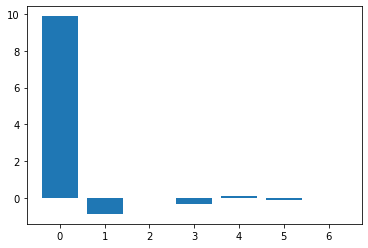

In [11]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_score = r2_score(y_test,y_pred)*100
print(f'R^2 score: {r2_score}')

importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest Regression

R^2 score: 40.59781394756724
Feature: 0, Score: 0.03054
Feature: 1, Score: 0.08828
Feature: 2, Score: 0.36487
Feature: 3, Score: 0.12873
Feature: 4, Score: 0.04041
Feature: 5, Score: 0.23034
Feature: 6, Score: 0.11683


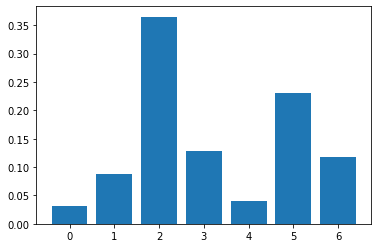

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_score = r2_score(y_test,y_pred)*100
print(f'R^2 score: {r2_score}')

importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Decision Tree

R^2 score: 38.900316157401505
Feature: 0, Score: 0.02439
Feature: 1, Score: 0.05442
Feature: 2, Score: 0.61407
Feature: 3, Score: 0.05181
Feature: 4, Score: 0.01039
Feature: 5, Score: 0.08392
Feature: 6, Score: 0.16100


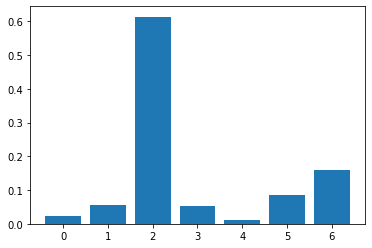

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_score = r2_score(y_test,y_pred)*100
print(f'R^2 score: {r2_score}')

importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### SVM

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score


model = SVR()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_score = r2_score(y_test,y_pred)*100
print(f'R^2 score: {r2_score}')

R^2 score: -2.8755927459474417


### Lasso

In [15]:
from sklearn import linear_model
from sklearn.metrics import r2_score

model = linear_model.Lasso(alpha=0.1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_score = r2_score(y_test,y_pred)*100
print(f'R^2 score: {r2_score}')

R^2 score: 12.55183166449141


### XGBoost Regression 

R^2 score: 46.74795778352947
Feature: 0, Score: 0.05364
Feature: 1, Score: 0.06353
Feature: 2, Score: 0.14039
Feature: 3, Score: 0.07292
Feature: 4, Score: 0.25680
Feature: 5, Score: 0.27111
Feature: 6, Score: 0.14162


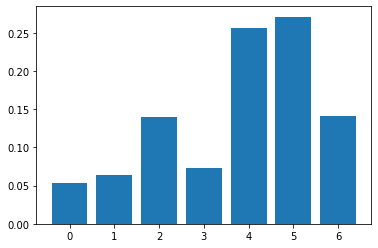

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


model = XGBRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_score = r2_score(y_test,y_pred)*100
print(f'R^2 score: {r2_score}')

importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Classification (Output variable: whether the item has sold or not )

### Define variables

In [20]:
x = df[['price','free_shipping', 'total_images', 'seller_rating', 'shoe_size', 'desc_fre_score', 'desc_avg_grade_score']]
y = df['sold']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [22]:
x_train, y_train

(      price  free_shipping  total_images  seller_rating  shoe_size  \
 192  385.00              1            12            541        8.0   
 314  190.00              0             7              7       10.5   
 242  195.00              0             7            672        3.5   
 174  189.99              0             3             40       12.5   
 97   195.00              1             3              5       11.0   
 ..      ...            ...           ...            ...        ...   
 307  214.99              0             6            551       10.5   
 246  195.00              0             5            738       12.5   
 222  192.99              0             8             50       10.5   
 93   179.95              1             8            836       11.5   
 40   152.50              0             3              3       10.5   
 
      desc_fre_score  desc_avg_grade_score  
 192            -158                    64  
 314             107                     4  
 242       

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(x, y)
predicted_classes = model.predict(x)
accuracy = accuracy_score(y,predicted_classes)
parameters = model.coef_

In [25]:
accuracy

0.7232704402515723

In [ ]:
X_classification = df[['price','free_shipping', 'total_images', 'seller_rating', 'shoe_size', 'desc_fre_score', 'desc_avg_grade_score']]
y_classification = df['sold']

### Logistic Regression

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_classification, y_classification)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest Classification

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_classification, y_classification)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### CART Classification

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_classification, y_classification)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### XGBoost Classification

In [ ]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()
# fit the model
model.fit(X_classification, y_classification)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()